In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

YOLOv8N

Dataset a moneta multipla

In [3]:
from ultralytics import YOLO
import numpy as np

model_multiple_n = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8n/moneta_multipla/runs/detect/train/weights/best.pt")

metrics_multiple_n = model_multiple_n.val(data="/content/gdrive/MyDrive/Progetto/Runs/yolov8n/moneta_multipla/dataV2.yaml")

precision = metrics_multiple_n.box.p
recall = metrics_multiple_n.box.r
f1_score = metrics_multiple_n.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision_multiple_n = np.mean(precision)
mean_recall_multiple_n = np.mean(recall)
mean_f1_multiple_n = np.mean(f1_score)
accuracy_multiple_n = (mean_precision_multiple_n * mean_recall_multiple_n) / (mean_precision_multiple_n + mean_recall_multiple_n)

print(f"Mean Precision: {mean_precision_multiple_n:.4f}")
print(f"Mean Recall: {mean_recall_multiple_n:.4f}")
print(f"Mean F1 Score: {mean_f1_multiple_n:.4f}")
print(f"Accuracy: {accuracy_multiple_n:.4f}")

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 13.1MB/s]
val: Scanning /content/gdrive/MyDrive/Progetto Finale/Runs/yolov8n/moneta_multipla/coin detection/datasetV2/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:43<00:00, 10.93s/it]


                   all         50        310      0.643      0.661      0.704      0.427
                   10c         26         29      0.616      0.414      0.491      0.274
                    1c         35         50      0.781      0.357      0.749       0.42
                    1e         24         30      0.817      0.767      0.831        0.5
                   20c         33         38      0.513      0.842      0.664      0.411
                    2c         32         46      0.436      0.738      0.656      0.359
                    2e         26         40      0.829       0.85      0.917      0.638
                   50c         25         32      0.486      0.812      0.687      0.427
                    5c         31         45      0.661      0.511      0.638      0.388
Speed: 10.2ms preprocess, 359.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
Precision per classe: [    0.61646     0.78132     0.81726     0.51336     0.4356

Saving test_9_jpg.rf.b9c14af919a420caebd28097cb3a8225.jpg to test_9_jpg.rf.b9c14af919a420caebd28097cb3a8225.jpg

image 1/1 /content/test_9_jpg.rf.b9c14af919a420caebd28097cb3a8225.jpg: 640x640 1 10c, 6 1es, 3 20cs, 3 2es, 1 50c, 1 5c, 486.7ms
Speed: 3.6ms preprocess, 486.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


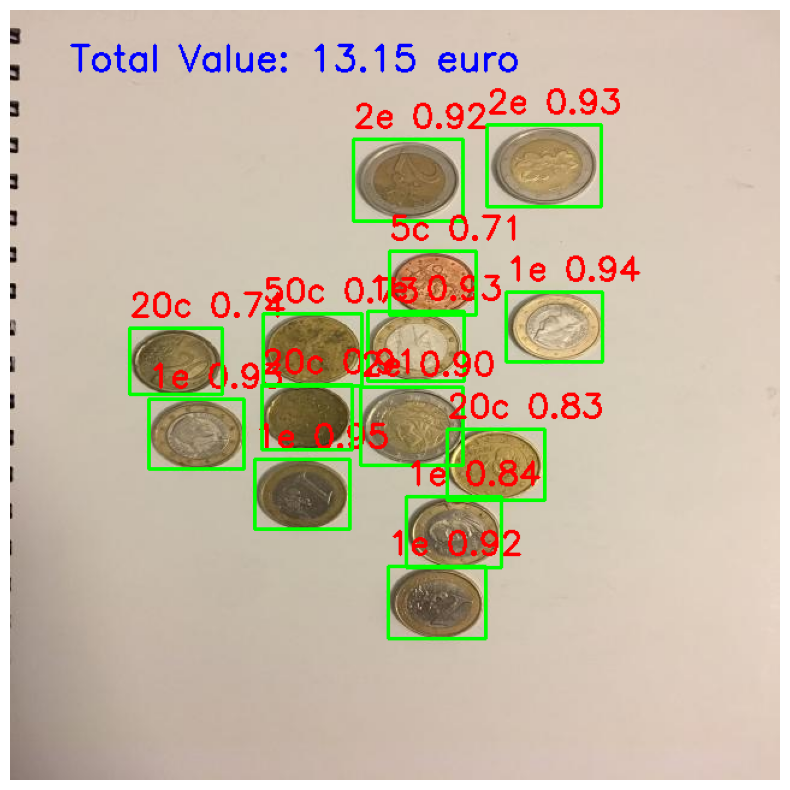

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files

#model_multiple_n = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8n/moneta_multipla/runs/detect/train/weights/best.pt")

uploaded = files.upload()

filename = list(uploaded.keys())[0]

file_bytes = np.frombuffer(uploaded[filename], np.uint8)
image_up = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_up, cv2.COLOR_BGR2RGB)

results = model_multiple_n.predict(source=filename, conf=0.25, iou=0.45)

class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

class_counts = {key: 0 for key in class_values.keys()}

def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1
    label = f'{class_name} {confidence:.2f}'

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")

SINGOLA MONETA

In [5]:
from ultralytics import YOLO
import numpy as np

model_single_n = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8n/singola_moneta/runs/detect/train/weights/best.pt")

metrics_single_n = model_single_n.val(data="/content/gdrive/MyDrive/Progetto/Runs/yolov8n/singola_moneta/data.yaml")

precision = metrics_single_n.box.p
recall = metrics_single_n.box.r
f1_score = metrics_single_n.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision_single_n = np.mean(precision)
mean_recall_single_n = np.mean(recall)
mean_f1_single_n = np.mean(f1_score)
accuracy_single_n = (mean_precision_single_n * mean_recall_single_n) / (mean_precision_single_n + mean_recall_single_n)

print(f"Mean Precision: {mean_precision_single_n:.4f}")
print(f"Mean Recall: {mean_recall_single_n:.4f}")
print(f"Mean F1 Score: {mean_f1_single_n:.4f}")
print(f"Accuracy: {accuracy_single_n:.4f}")

Conteggi delle classi:
1c: 0
2c: 0
5c: 1
10c: 0
20c: 3
50c: 1
1e: 6
2e: 3

Valore totale delle monete: €13.15
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/Progetto Finale/Runs/yolov8n/singola_moneta/coin detection_s/dataset/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.59s/it]


                   all         48         48      0.913      0.961      0.993       0.92
                    1c          5          5      0.901          1      0.995      0.838
                    2c          3          3          1      0.943      0.995      0.995
                    5c         11         11      0.976      0.909      0.981      0.907
                   10c          6          6      0.541          1      0.995      0.887
                   20c          4          4          1      0.837      0.995      0.895
                   50c          6          6      0.969          1      0.995      0.929
                    1e          6          6      0.958          1      0.995      0.915
                    2e          7          7      0.962          1      0.995      0.995
Speed: 8.5ms preprocess, 316.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2
Precision per classe: [    0.90107           1     0.97594     0.54106           

Saving 36_jpg.rf.5fd6d5fccbc3dd12fc32fe7deb22a7b1.jpg to 36_jpg.rf.5fd6d5fccbc3dd12fc32fe7deb22a7b1.jpg

image 1/1 /content/36_jpg.rf.5fd6d5fccbc3dd12fc32fe7deb22a7b1.jpg: 640x640 1 1c, 438.1ms
Speed: 8.6ms preprocess, 438.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


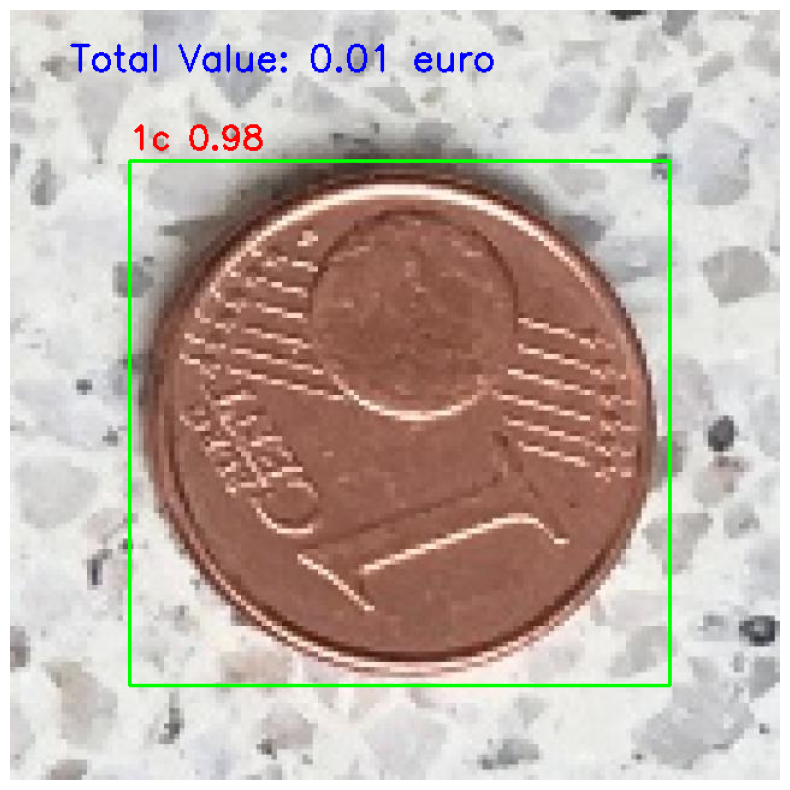

Conteggi delle classi:
1c: 1
2c: 0
5c: 0
10c: 0
20c: 0
50c: 0
1e: 0
2e: 0

Valore totale delle monete: €0.01


In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files

#model_single_n = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8n/singola_moneta/runs/detect/train/weights/best.pt")

uploaded = files.upload()

filename = list(uploaded.keys())[0]

file_bytes = np.frombuffer(uploaded[filename], np.uint8)
image_up = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_up, cv2.COLOR_BGR2RGB)

results = model_single_n.predict(source=filename, conf=0.25, iou=0.45)

class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

class_counts = {key: 0 for key in class_values.keys()}

def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1
    label = f'{class_name} {confidence:.2f}'

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")

YOLOv8S

Dataset a moneta multipla

In [7]:
from ultralytics import YOLO
import numpy as np

model_multiple_s = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8s/moneta_multipla/runs/detect/train/weights/best.pt")

metrics_multiple_s = model_multiple_s.val()

precision = metrics_multiple_s.box.p
recall = metrics_multiple_s.box.r
f1_score = metrics_multiple_s.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision_multiple_s = np.mean(precision)
mean_recall_multiple_s = np.mean(recall)
mean_f1_multiple_s = np.mean(f1_score)
accuracy_multiple_s = (mean_precision_multiple_s * mean_recall_multiple_s) / (mean_precision_multiple_s + mean_recall_multiple_s)

print(f"Mean Precision: {mean_precision_multiple_s:.4f}")
print(f"Mean Recall: {mean_recall_multiple_s:.4f}")
print(f"Mean F1 Score: {mean_f1_multiple_s:.4f}")
print(f"Accuracy: {accuracy_multiple_s:.4f}")

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/gdrive/My Drive/Università/coin detection/Dataset/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:01<00:00, 15.37s/it]


                   all         50        310       0.55      0.686      0.672      0.418
                   10c         26         29      0.323      0.828      0.582      0.342
                    1c         35         50      0.706       0.72      0.788      0.453
                    1e         24         30        0.7      0.778      0.844      0.544
                   20c         33         38       0.43      0.684        0.5      0.331
                    2c         32         46      0.461      0.674      0.606      0.311
                    2e         26         40      0.704      0.715       0.86      0.637
                   50c         25         32      0.461      0.531      0.543       0.32
                    5c         31         45      0.617      0.556      0.653      0.405
Speed: 4.2ms preprocess, 955.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val3
Precision per classe: [    0.32282     0.70562     0.69987     0.43021      0.460

Saving 20240523_173352_jpg.rf.267b92b9a92a098349885c05fc9f0275.jpg to 20240523_173352_jpg.rf.267b92b9a92a098349885c05fc9f0275.jpg

image 1/1 /content/20240523_173352_jpg.rf.267b92b9a92a098349885c05fc9f0275.jpg: 640x640 2 10cs, 1 2e, 1 50c, 677.9ms
Speed: 3.0ms preprocess, 677.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


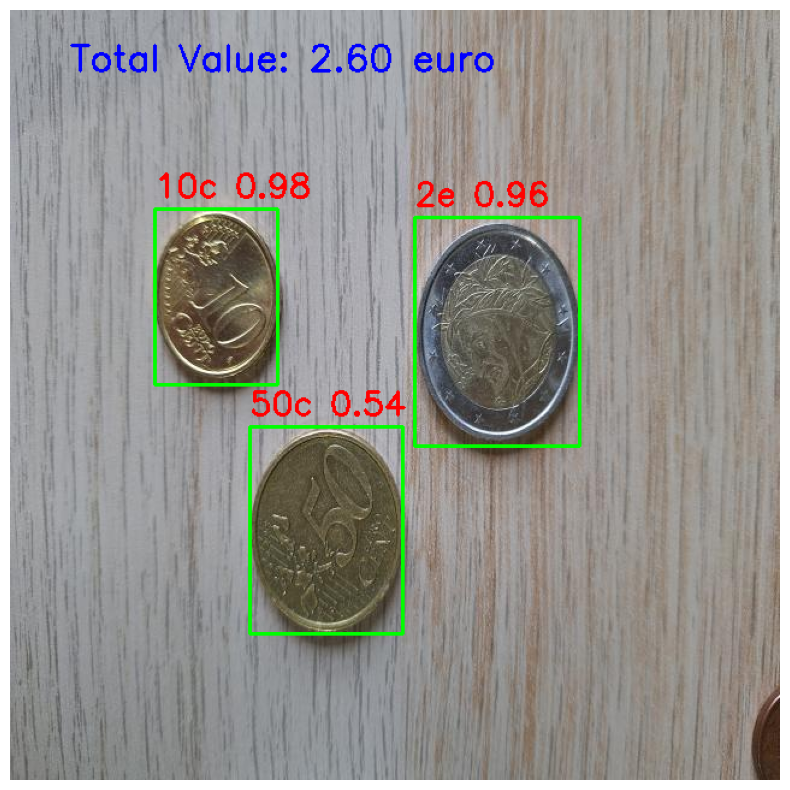

Conteggi delle classi:
1c: 0
2c: 0
5c: 0
10c: 1
20c: 0
50c: 1
1e: 0
2e: 1

Valore totale delle monete: €2.60


In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files

#model_multiple_s = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8s/moneta_multipla/runs/detect/train/weights/best.pt")

uploaded = files.upload()

filename = list(uploaded.keys())[0]

file_bytes = np.frombuffer(uploaded[filename], np.uint8)
image_up = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_up, cv2.COLOR_BGR2RGB)

results = model_multiple_s.predict(source=filename, conf=0.25, iou=0.45)

class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

class_counts = {key: 0 for key in class_values.keys()}

def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1
    label = f'{class_name} {confidence:.2f}'

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")

SINGOLA MONETA


In [9]:
from ultralytics import YOLO

model_single_s = YOLO("/content/gdrive/MyDrive/Università/Single_dataset/runs/detect/train2/weights/best.pt")

metrics_single_s = model_single_s.val(data="/content/gdrive/MyDrive/Università/coin detection/Dataset_single/data.yaml")

precision = metrics_single_s.box.p
recall = metrics_single_s.box.r
f1_score = metrics_single_s.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision_single_s = np.mean(precision)
mean_recall_single_s = np.mean(recall)
mean_f1_single_s = np.mean(f1_score)
accuracy_single_s = (mean_precision_single_s * mean_recall_single_s) / (mean_precision_single_s + mean_recall_single_s)

print(f"Mean Precision: {mean_precision_single_s:.4f}")
print(f"Mean Recall: {mean_recall_single_s:.4f}")
print(f"Mean F1 Score: {mean_f1_single_s:.4f}")
print(f"Accuracy: {accuracy_single_s:.4f}")

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/gdrive/My Drive/Università/coin detection/Dataset_single/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:54<00:00, 18.01s/it]


                   all         48         48      0.834      0.931      0.975      0.912
                    1c          5          5      0.748          1      0.995      0.846
                    2c          3          3          1      0.861      0.995      0.995
                    5c         11         11      0.825      0.909      0.922      0.896
                   10c          6          6      0.671          1      0.995      0.911
                   20c          4          4          1      0.681      0.912      0.834
                   50c          6          6       0.53          1      0.995      0.913
                    1e          6          6      0.947          1      0.995      0.921
                    2e          7          7       0.95          1      0.995       0.98
Speed: 6.0ms preprocess, 876.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val4
Precision per classe: [    0.74817           1     0.82481     0.67134           

Saving 888_jpg.rf.115dbce8664772055b5f428df92f60aa.jpg to 888_jpg.rf.115dbce8664772055b5f428df92f60aa.jpg

image 1/1 /content/888_jpg.rf.115dbce8664772055b5f428df92f60aa.jpg: 640x640 1 50c, 675.3ms
Speed: 3.6ms preprocess, 675.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


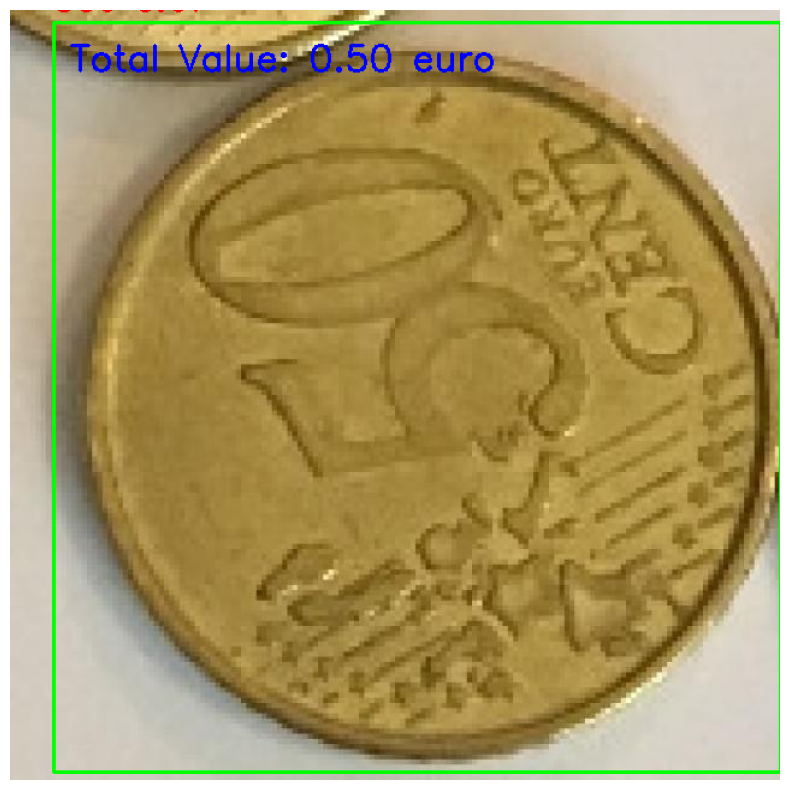

Conteggi delle classi:
1c: 0
2c: 0
5c: 0
10c: 0
20c: 0
50c: 1
1e: 0
2e: 0

Valore totale delle monete: €0.50


In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files
import numpy as np

#model_single_s = YOLO("/content/gdrive/MyDrive/Progetto/Runs/yolov8s/moneta_multipla/runs/detect/train/weights/best.pt")

uploaded = files.upload()

filename = list(uploaded.keys())[0]

file_bytes = np.frombuffer(uploaded[filename], np.uint8)
image_up = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_up, cv2.COLOR_BGR2RGB)

results = model_single_s.predict(source=filename, conf=0.25, iou=0.45)

class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

class_counts = {key: 0 for key in class_values.keys()}

def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:

    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1
    label = f'{class_name} {confidence:.2f}'

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")

Differenza metriche tra yolov8n e yolov8s nell'object detection di monete multiple

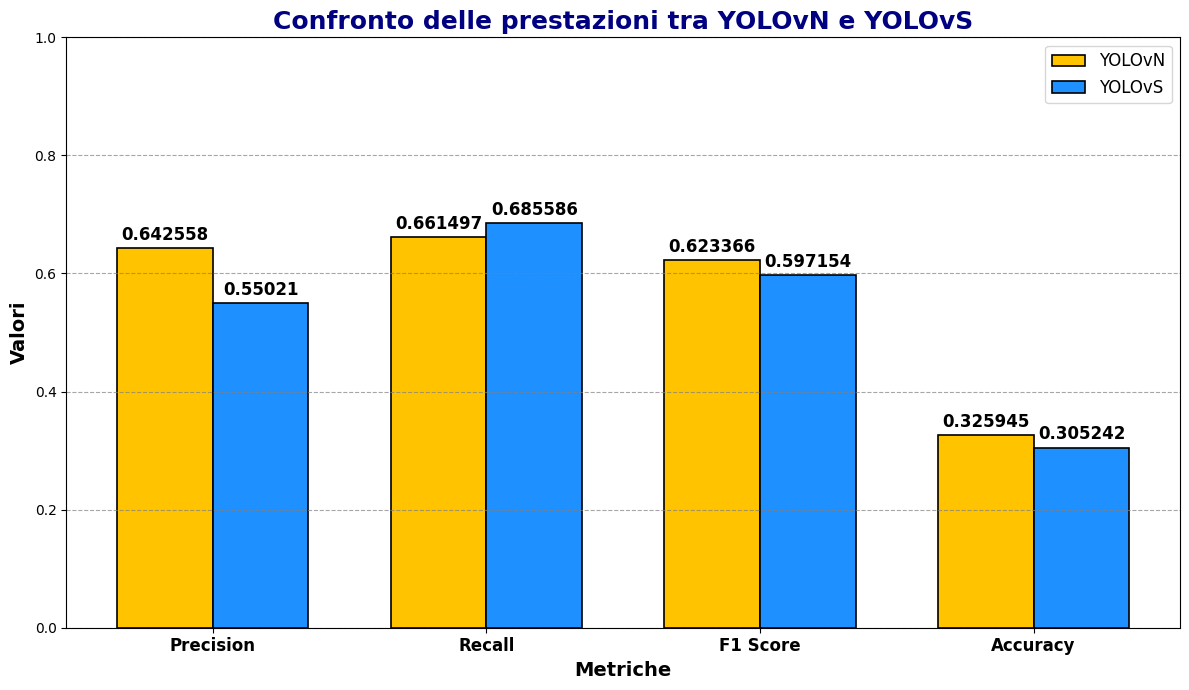

In [13]:
labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
yolovn_values = [mean_precision_multiple_n, mean_recall_multiple_n, mean_f1_multiple_n, accuracy_multiple_n]
yolovs_values = [mean_precision_multiple_s, mean_recall_multiple_s, mean_f1_multiple_s, accuracy_multiple_s]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, yolovn_values, width, label='YOLOvN', color='#FFC300', edgecolor='black', linewidth=1.2)  # Giallo dorato
bars2 = ax.bar(x + width/2, yolovs_values, width, label='YOLOvS', color='#1E90FF', edgecolor='black', linewidth=1.2)  # Azzurro

ax.set_xlabel('Metriche', fontsize=14, fontweight='bold')
ax.set_ylabel('Valori', fontsize=14, fontweight='bold')
ax.set_title('Confronto delle prestazioni tra YOLOvN e YOLOvS', fontsize=18, fontweight='bold', color='navy')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')

ax.bar_label(bars1, padding=3, fontsize=12, fontweight='bold', color='black')
ax.bar_label(bars2, padding=3, fontsize=12, fontweight='bold', color='black')

ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)

ax.set_ylim([0, 1])

fig.tight_layout()

plt.show()

Differenza metriche tra yolov8n e yolov8s nell'object detection di singola moneta

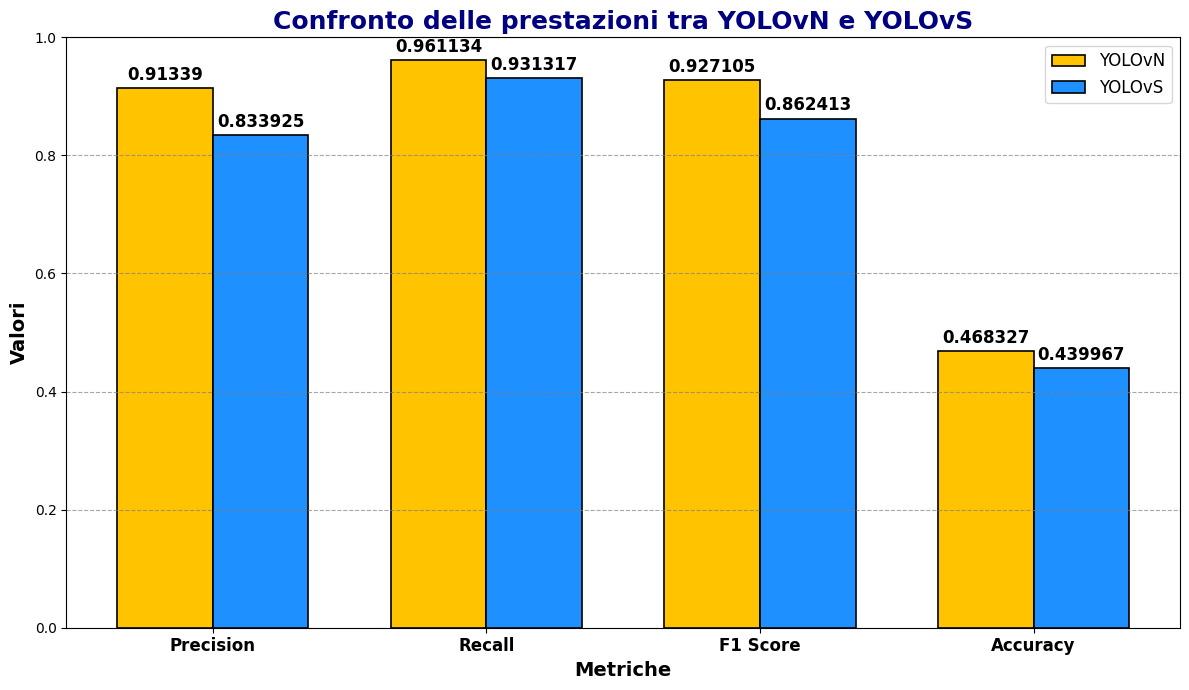

In [14]:
labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
yolovn_values = [mean_precision_single_n, mean_recall_single_n, mean_f1_single_n, accuracy_single_n]
yolovs_values = [mean_precision_single_s, mean_recall_single_s, mean_f1_single_s, accuracy_single_s]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, yolovn_values, width, label='YOLOvN', color='#FFC300', edgecolor='black', linewidth=1.2)  # Giallo dorato
bars2 = ax.bar(x + width/2, yolovs_values, width, label='YOLOvS', color='#1E90FF', edgecolor='black', linewidth=1.2)  # Azzurro

ax.set_xlabel('Metriche', fontsize=14, fontweight='bold')
ax.set_ylabel('Valori', fontsize=14, fontweight='bold')
ax.set_title('Confronto delle prestazioni tra YOLOvN e YOLOvS', fontsize=18, fontweight='bold', color='navy')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')

ax.bar_label(bars1, padding=3, fontsize=12, fontweight='bold', color='black')
ax.bar_label(bars2, padding=3, fontsize=12, fontweight='bold', color='black')

ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)

ax.set_ylim([0, 1])

fig.tight_layout()

plt.show()

CONFRONTO TRA MONETA SINGOLA E MONETA MULTIPLA

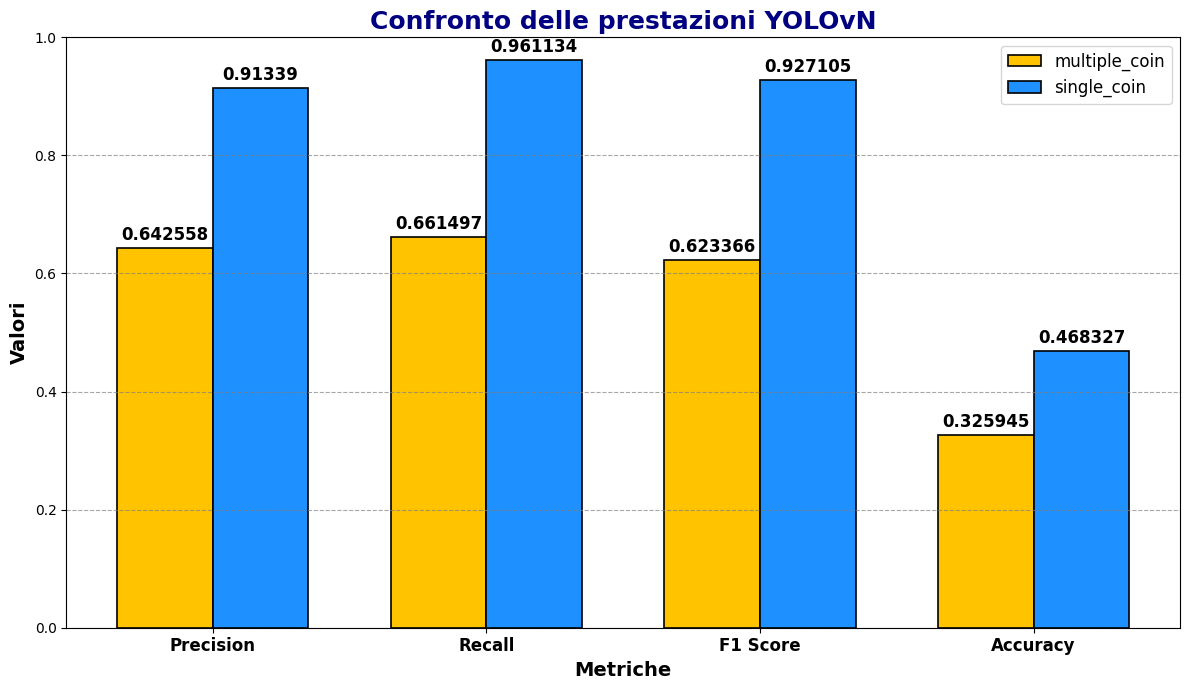

In [15]:
labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
yolovn_values = [mean_precision_multiple_n, mean_recall_multiple_n, mean_f1_multiple_n, accuracy_multiple_n]
yolovs_values = [mean_precision_single_n, mean_recall_single_n, mean_f1_single_n, accuracy_single_n]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, yolovn_values, width, label='multiple_coin', color='#FFC300', edgecolor='black', linewidth=1.2)  # Giallo dorato
bars2 = ax.bar(x + width/2, yolovs_values, width, label='single_coin', color='#1E90FF', edgecolor='black', linewidth=1.2)  # Azzurro

ax.set_xlabel('Metriche', fontsize=14, fontweight='bold')
ax.set_ylabel('Valori', fontsize=14, fontweight='bold')
ax.set_title('Confronto delle prestazioni YOLOvN', fontsize=18, fontweight='bold', color='navy')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')

ax.bar_label(bars1, padding=3, fontsize=12, fontweight='bold', color='black')
ax.bar_label(bars2, padding=3, fontsize=12, fontweight='bold', color='black')

ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)

ax.set_ylim([0, 1])

fig.tight_layout()

plt.show()

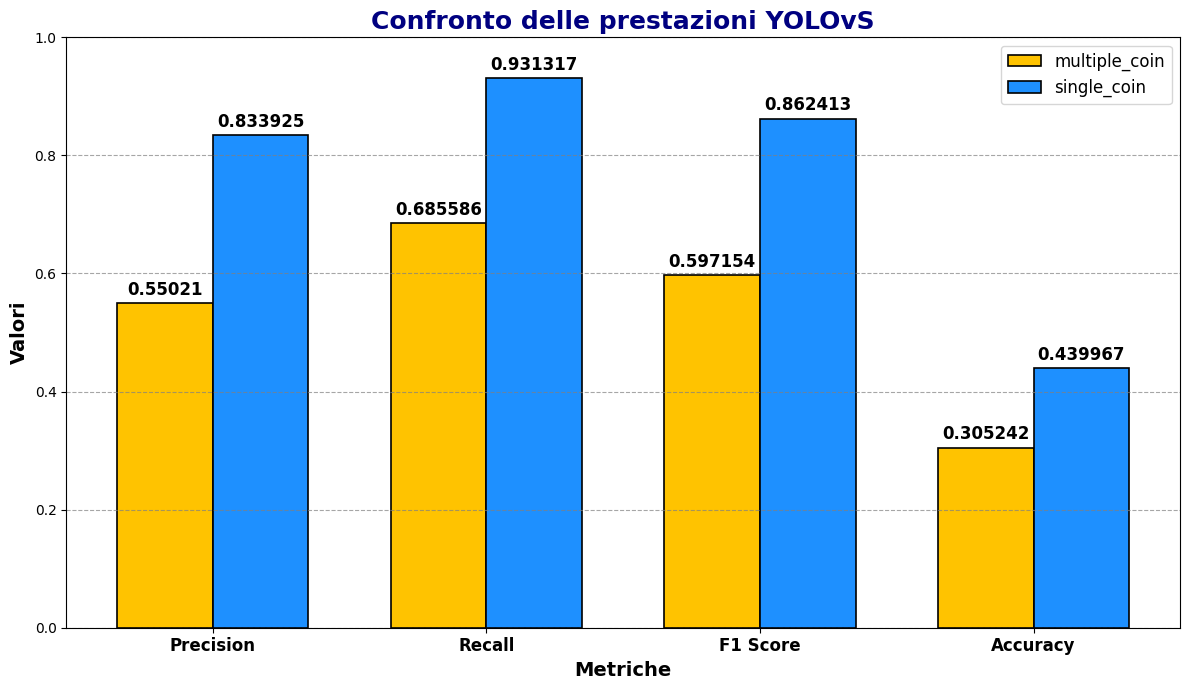

In [16]:
# Dati per il grafico
labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
yolovn_values = [mean_precision_multiple_s, mean_recall_multiple_s, mean_f1_multiple_s, accuracy_multiple_s]
yolovs_values = [mean_precision_single_s, mean_recall_single_s, mean_f1_single_s, accuracy_single_s]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, yolovn_values, width, label='multiple_coin', color='#FFC300', edgecolor='black', linewidth=1.2)  # Giallo dorato
bars2 = ax.bar(x + width/2, yolovs_values, width, label='single_coin', color='#1E90FF', edgecolor='black', linewidth=1.2)  # Azzurro

ax.set_xlabel('Metriche', fontsize=14, fontweight='bold')
ax.set_ylabel('Valori', fontsize=14, fontweight='bold')
ax.set_title('Confronto delle prestazioni YOLOvS', fontsize=18, fontweight='bold', color='navy')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')

ax.bar_label(bars1, padding=3, fontsize=12, fontweight='bold', color='black')
ax.bar_label(bars2, padding=3, fontsize=12, fontweight='bold', color='black')

ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)

ax.set_ylim([0, 1])

fig.tight_layout()

plt.show()